# 图形绘制
>图形可视化是非常强大的工具

[Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling)的[例子](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen)
![hans](http://bazhou.blob.core.windows.net/learning/mpp/hans_rosling.jpg)

<video width="80%" controls src="http://bazhou.blob.core.windows.net/learning/mpp/1193_The_best_stats_you_ve_ever_seen_-_Hans_Rosling-usdJgEwMinM.mp4" />


## Matplot

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

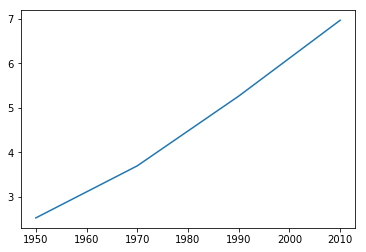

In [3]:
import matplotlib.pyplot as plt  
year = [1950, 1970, 1990, 2010]      # 世界人口数据
pop = [2.519, 3.692, 5.263, 6.972] 
plt.plot(year, pop)                  # 折线图
plt.show()

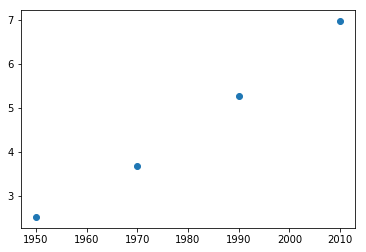

In [73]:
plt.scatter(year, pop)               # 散点图
plt.show()

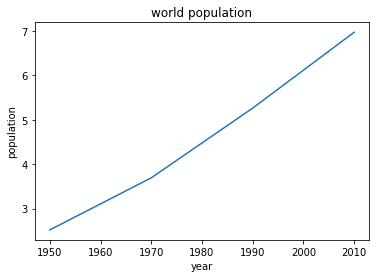

In [160]:
plt.plot(year, pop)
plt.xlabel("year")                # 不能使用Unicode, "年"
plt.ylabel("population")          # 坐标轴标注
plt.title("world population")     # 标题
plt.show()

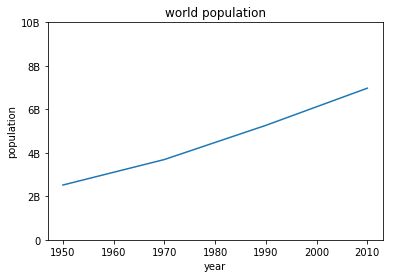

In [74]:
plt.plot(year, pop)
plt.xlabel("year")
plt.ylabel("population")
plt.title("world population")
plt.yticks([0,2,4,6,8,10],
    ["0","2B","4B","6B","8B","10B"])        # 坐标轴刻度
plt.show()

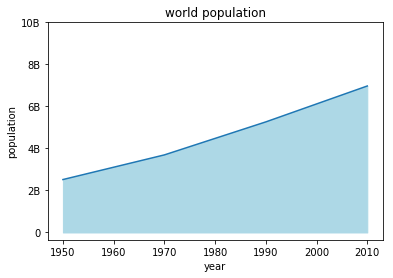

In [161]:
plt.plot(year, pop)
plt.fill_between(year,pop,0,color='lightblue') # 填充色
plt.xlabel("year")
plt.ylabel("population")
plt.title("world population")
plt.yticks([0,2,4,6,8,10],
    ["0","2B","4B","6B","8B","10B"])
plt.show()

## 直方图

- 数据分布的可视化
- 数据分布

![分布](http://bazhou.blob.core.windows.net/learning/mpp/distribution.png)

> [直方图](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)文档
![histlink](http://bazhou.blob.core.windows.net/learning/mpp/histlink.png)

![histdoc](http://bazhou.blob.core.windows.net/learning/mpp/hist.png)

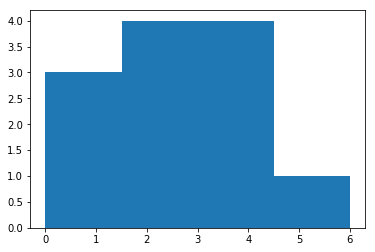

In [162]:
values = [0,0.6,1.4,1.6,2.2,2.5,2.6,3.2,3.5,3.9,4.2,6] 
plt.hist(values, bins=4)                                    # 分布区间数目
plt.show()

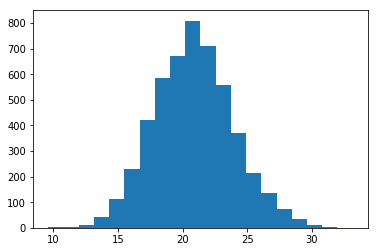

In [163]:
plt.hist(shmale_bmi, bins=20)     # 几乎是一个钟形曲线
plt.show()

### Sigmoid

$$ f(x)=\frac{1}{1+e^{-x}} $$

> [wolframalpha search](https://www.wolframalpha.com/input/?i=sigmoid(x))

In [4]:
import numpy as np
np.seterr(all='warn', over='ignore', under='ignore')

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

sigmoid(np.array([-2110, -34, -5, 0, 2, 3, 4, 5, 16, 799, 10240]))

array([0.00000000e+00, 1.71390843e-15, 6.69285092e-03, 5.00000000e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.99999887e-01, 1.00000000e+00, 1.00000000e+00])

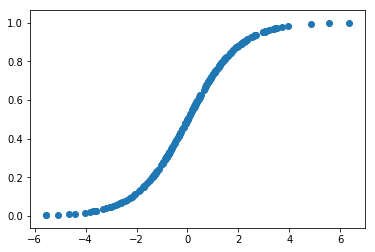

In [60]:
import matplotlib.pyplot as plt
sample = np.random.normal(0, 2, 256)
plt.scatter(sample, sigmoid(sample))
plt.show()

## pandas

- I/O
- SQL like DataFrame

### 数据源

[CIA world factbook](https://www.cia.gov/library/publications/the-world-factbook/rankorder/rankorderguide.html)

In [7]:
import pandas as pd

electricity_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2233.txt')
nature_gas_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2250.txt')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 12, saw 5


In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd

electricity_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2233.txt')
nature_gas_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2250.txt')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 12, saw 5


In [9]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd

electricity_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2233.txt', engine='python')
nature_gas_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2250.txt', engine='python')

ParserError: Expected 4 fields in line 12, saw 5

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd

electricity_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2233.txt', engine='python', header=None)
nature_gas_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2250.txt', engine='python', header=None)

In [ ]:
energy_consuming = nature_gas_consuming.set_index('country').join(electricity_consuming.set_index('country'))
energy_consuming

In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd

electricity_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2233.txt', 
                                    delimiter='\s{2,}', engine='python', header=None,
                                    names=['erank', 'country', 'etotal'], thousands=',')
nature_gas_consuming = pd.read_csv('https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2250.txt', 
                                   delimiter='\s{2,}', engine='python', header=None,
                                   names=['nrank', 'country', 'ntotal'], thousands=',')


In [11]:
electricity_consuming

,erank,country,etotal
0,1,China,5920000000000
1,2,United States,3911000000000
2,3,European Union,2845000000000
3,4,India,1048000000000
4,5,Japan,933600000000
5,6,Russia,890100000000
6,7,Canada,516600000000
7,8,Germany,514600000000
8,9,"Korea, South",497000000000
9,10,Brazil,460800000000


In [12]:
nature_gas_consuming

,nrank,country,ntotal
0,1,United States,773200000000
1,2,European Union,428800000000
2,3,Russia,418900000000
3,4,China,186200000000
4,5,Iran,186000000000
5,6,Japan,123600000000
6,7,Canada,114800000000
7,8,Saudi Arabia,102300000000
8,9,Germany,81350000000
9,10,Mexico,77930000000


In [39]:
electricity_consuming

,erank,country,etotal
0,1,China,5920000000000
1,2,United States,3911000000000
2,3,European Union,2845000000000
3,4,India,1048000000000
4,5,Japan,933600000000
5,6,Russia,890100000000
6,7,Canada,516600000000
7,8,Germany,514600000000
8,9,"Korea, South",497000000000
9,10,Brazil,460800000000


### join

In [14]:
energy_consuming = nature_gas_consuming.set_index('country').join(electricity_consuming.set_index('country'))
energy_consuming

,nrank,ntotal,erank,etotal
country,,,,
United States,1,773200000000,2.0,3.911000e+12
European Union,2,428800000000,3.0,2.845000e+12
Russia,3,418900000000,6.0,8.901000e+11
China,4,186200000000,1.0,5.920000e+12
Iran,5,186000000000,20.0,2.209000e+11
Japan,6,123600000000,5.0,9.336000e+11
Canada,7,114800000000,7.0,5.166000e+11
Saudi Arabia,8,102300000000,14.0,2.928000e+11
Germany,9,81350000000,8.0,5.146000e+11


In [15]:
energy_consuming.sort_values(by=['etotal', 'ntotal'], ascending=False)

,nrank,ntotal,erank,etotal
country,,,,
China,4,186200000000,1.0,5.920000e+12
United States,1,773200000000,2.0,3.911000e+12
European Union,2,428800000000,3.0,2.845000e+12
India,19,47520000000,4.0,1.048000e+12
Japan,6,123600000000,5.0,9.336000e+11
Russia,3,418900000000,6.0,8.901000e+11
Canada,7,114800000000,7.0,5.166000e+11
Germany,9,81350000000,8.0,5.146000e+11
"Korea, South",12,69630000000,9.0,4.970000e+11
